## **Import TensorFlow and check TF Version**

텐서플로우 라이브러리를 임포트 한 후 버전을 확인한다.

In [ ]:
import tensorflow as tf #Tested code with tf version==2.3.0
print(tf.__version__)

2.3.0


## **Hyper Parameters Setting**

모델을 학습하기 위한 하이퍼 파라미터를 설정한다.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import argparse, cv2, os
import matplotlib.pyplot as plt


args = {"weight_init":None,
        "model_input":(227,227,3),
        "output_feature":100,
        "batch_size": 128,
        "epoch":100,
        "learning_rate":0.01,
        "momentum": 0.9,
        "decay":0.005,
        "optimizer":"SGD"}

## **Data load and Split**
하단의 트레이닝과 테스트 결과를 보면,
트레이닝은 90% 이상의 정확도를 보이는 반면 테스트 정확도는 한참 미치지 못하는 약 17%를 나타낸다.
이를 overfitting의 결과로 예상되며, data augmentation을 통해 적은 데이터 셋을 보완하고 과도학습되는 overfitting을 방지할 수 있을 것이다.
더불어 overfitting을 방지하기 위하여, 
모델의 가장 밑부분인 Fully connected 부분에 배치 정규화와 드롭아웃을 적용해 보았으나, 이 역시 한 레이블당 150개의 데이터가 있는 적은 데이터 셋에는 효과가 미미하여 data augmentation의 효과에 기대할 수 있음으로 추측한다.

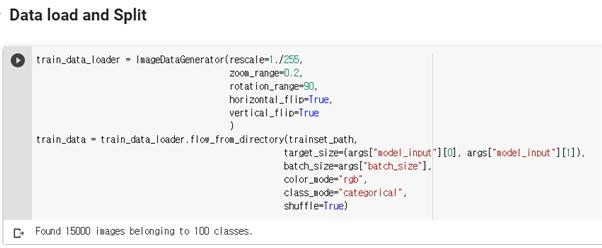

In [ ]:
train_data_loader = ImageDataGenerator(rescale=1./255)
train_data = train_data_loader.flow_from_directory(trainset_path,
                                                  target_size=(args["model_input"][0], args["model_input"][1]),
                                                  batch_size=args["batch_size"],
                                                  color_mode="rgb",
                                                  class_mode="categorical",
                                                  shuffle=True)

Found 15000 images belonging to 100 classes.


In [ ]:
test_data_loader = ImageDataGenerator(rescale=1./255)

test_data = test_data_loader.flow_from_directory(testset_path,
                                                 target_size=(args["model_input"][0], args["model_input"][1]),
                                                 batch_size=args["batch_size"],
                                                 color_mode="rgb",
                                                 class_mode="categorical",
                                                 shuffle=True,
                                                 seed=42)

Found 2000 images belonging to 100 classes.


## **CNN Model**


## **Build and train the CNN Model**

Build your model (initialize model in program)

Ex) alexnet(), vgg(), resnet_18(), resnet_34(), resnet_50(), resnet_101() etc.

In [ ]:
################# VGG 16 Net#################
model = tf.keras.models.Sequential([
                                    
  ############ 1층 convolution ############                                  
  # conv1_1 64개의 kernel size 3인 필터커널로 convolution, padding사용, stride 1 설정, 활성화 함수는 ReLU
  tf.keras.layers.Conv2D(64, kernel_size=3, strides=1,padding='same', activation='relu', input_shape=(227,227,3)),
    # output shape 227*227*64 
  
  ############ 2층 convolution ############ 
  # conv1_2 64개의 kernel size 3인 필터커널로 convolution, padding사용, stride 1 설정, 활성화 함수는 ReLU
  tf.keras.layers.Conv2D(64, kernel_size=3, strides=1,padding='same', activation='relu'),
    # output shape 227*227*64
  
  # 2*2 최대 pooling, stride 2 설정
  tf.keras.layers.MaxPool2D((2,2),strides=2),
  # 사이즈 축소 227*227*64 -> 113*113*64

  ############ 3층 convolution ############         
  # conv2_1 128개의 kernel size 3인 필터커널로 convolution, padding사용, stride 1 설정, 활성화 함수는 ReLU
  tf.keras.layers.Conv2D(128, kernel_size=3, strides=1,padding='same', activation='relu'),
    # output shape 113*113*128
  
  ############ 4층 convolution ############ 
  # conv2_2 128개의 kernel size 3인 필터커널로 convolution, padding사용, stride 1 설정, 활성화 함수는 ReLU
  tf.keras.layers.Conv2D(128, kernel_size=3, strides=1,padding='same', activation='relu'),
    # output shape 113*113*128
  
  # 2*2 최대 pooling, stride 2 설정 
  tf.keras.layers.MaxPool2D((2,2),strides=2),
  # 사이즈 축소 113*113*128 -> 56*56*128

 ############ 5층 convolution ############ 
  # conv3_1 236개의 kernel size 3인 필터커널로 convolution, padding사용, stride 1 설정, 활성화 함수는 ReLU
  tf.keras.layers.Conv2D(256, kernel_size=3, strides=1,padding='same', activation='relu'),
  # output shape 56*56*256

 ############ 6층 convolution ############ 
  # conv3_2 236개의 kernel size 3인 필터커널로 convolution, padding사용, stride 1 설정, 활성화 함수는 ReLU
  tf.keras.layers.Conv2D(256, kernel_size=3, strides=1,padding='same', activation='relu'),
    # output shape 56*56*256

 ############ 7층 convolution ############   
  # conv3_3 236개의 kernel size 3인 필터커널로 convolution, padding사용, stride 1 설정, 활성화 함수는 ReLU
  tf.keras.layers.Conv2D(256, kernel_size=3, strides=1,padding='same', activation='relu'),
    # output shape 56*56*256
  
  # 2*2 최대 pooling, stride 2 설정
  tf.keras.layers.MaxPool2D((2,2),strides=2),
  # 사이즈 축소 56*56*256 -> 28*28*256


 ############ 8층 convolution ############ 
  # conv4_1 512개의 kernel size 3인 필터커널로 convolution, padding사용, stride 1 설정, 활성화 함수는 ReLU
  tf.keras.layers.Conv2D(512, kernel_size=3, strides=1,padding='same', activation='relu'),
    # output shape 28, 28, 512
  
 ############ 9층 convolution ############   
  # conv4_2 512개의 kernel size 3인 필터커널로 convolution, padding사용, stride 1 설정, 활성화 함수는 ReLU
  tf.keras.layers.Conv2D(512, kernel_size=3, strides=1,padding='same', activation='relu'),   
  # output shape 28, 28, 512
 
 ############ 10층 convolution ############   
  # conv4_3 512개의 kernel size 3인 필터커널로 convolution, padding사용, stride 1 설정, 활성화 함수는 ReLU
  tf.keras.layers.Conv2D(512, kernel_size=3, strides=1,padding='same', activation='relu'),  
  # output shape 28, 28, 512
  
  # 2*2 최대 pooling, stride 2 설정 
  tf.keras.layers.MaxPool2D((2,2),strides=2),
    # 사이즈 축소 28, 28, 512 -> 14, 14, 512


 ############ 11층 convolution ############ 
 # conv5_1 512개의 kernel size 3인 필터커널로 convolution, padding사용, stride 1 설정, 활성화 함수는 ReLU
  tf.keras.layers.Conv2D(512, kernel_size=3, strides=1,padding='same', activation='relu'),
    # output shape 14, 14, 512
  
 ############ 12층 convolution ############ 
  # conv5_2 512개의 kernel size 3인 필터커널로 convolution, padding사용, stride 1 설정, 활성화 함수는 ReLU
  tf.keras.layers.Conv2D(512, kernel_size=3, strides=1,padding='same', activation='relu'),
  # output shape 14, 14, 512

 ############ 13층 convolution ############ 
  # conv5_3 512개의 kernel size 3인 필터커널로 convolution, padding사용, stride 1 설정, 활성화 함수는 ReLU
  tf.keras.layers.Conv2D(512, kernel_size=3, strides=1,padding='same', activation='relu'),
  # output shape 14, 14, 512
  
  # 2*2 최대 pooling, stride 2 설정 
  tf.keras.layers.MaxPool2D((2,2),strides=2),
  # 사이즈 축소 14, 14, 512 -> 7, 7, 512


 ############ 14층 Fully connected ############ 
  # 이 전 층의 출력을 받아서 1차원 벡터로 flatten 해준다.
  tf.keras.layers.Flatten(),
  # ouput 25088
  
  # 4096개의 뉴런과 Fully connected
  tf.keras.layers.Dense(4096,activation='relu'),
  #tf.keras.layers.BatchNormalization(), 효과가 미미하여 삭제함
  #tf.keras.layers.Dropout(0.5), 효과가 미미하여 삭제함
  # ouput 4096

 ############ 15층 Fully connected ############ 
  # 4096개의 뉴런과 Fully connected
  tf.keras.layers.Dense(4096,activation='relu'),
  #tf.keras.layers.BatchNormalization(), 효과가 미미하여 삭제함
  #tf.keras.layers.Dropout(0.5), 효과가 미미하여 삭제함
  # ouput 4096

 ############ 16층 Fully connected ############ 
  # class의 갯수가 100개이므로 100개의 뉴런과 Fully connected
  tf.keras.layers.Dense(100,activation='softmax')
  # ouput 100

])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 227, 227, 64)      1792      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 227, 227, 64)      36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 113, 113, 64)      0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 113, 113, 128)     73856     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 113, 113, 128)     147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 56, 56, 256)      

*** 하단 Trainging 부분 설명***
- 총 100 epoch을 계획했으나, 31 epoch에서 트레이닝 정확도가 90%를 초과하여 overfitting을 예방하기위해 멈추었습니다.
그리고 
이 부분 코드의 결과창을 따로 저장하지 못하고 스크린샷만 해놓았습니다.
그래서 31 epoch까지 돌릴때의 스크린 샷을 첨부합니다!

- 약 17%의 테스트 정확도를 확인 할 수 있었습니다.

- batch_size=64, epoch=25, learning_rate=0.001
- 위의 파라미터로 실험하였을 때 테스트 정확도가 1%더 높은 18.15%를 확인할 수 있었습니다.
하지만 스크린샷과 결과 코드를 저장해 놓지 않아 두번째로 정확도가 높게나온 이번 실험 모델을 보여드리도록 하겠습니다.

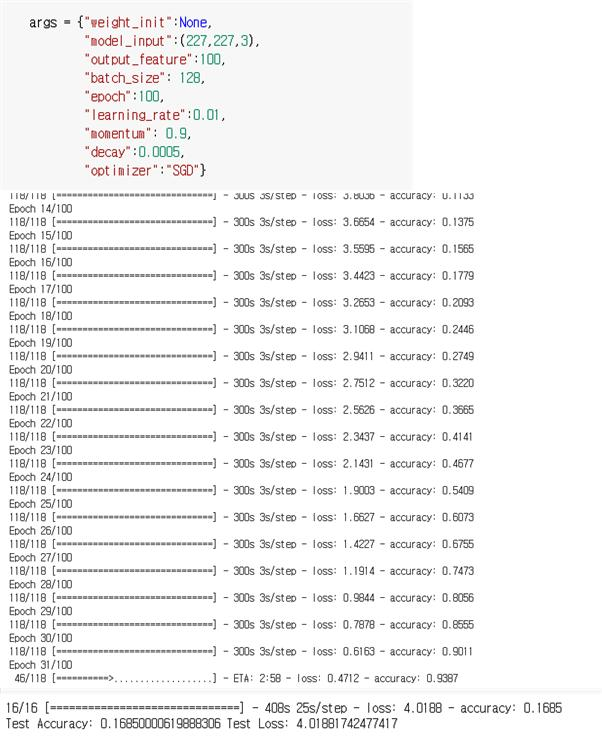


In [ ]:
######## 원래 코드 ###########
with tf.device('/gpu:0'):
  model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(lr=args["learning_rate"], decay=args["decay"]),
              metrics=['accuracy'])


log_dir_path = "logs/my_board/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir_path, histogram_freq=1)

model.fit(train_data, epochs=args["epoch"], verbose=1, callbacks=[tensorboard_callback])
  

In [ ]:
###### fit하고 runtime out이 되기 전에, 같은 셀에서 test하기 위한 코드######
with tf.device('/gpu:0'):

  model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.SGD(lr=args["learning_rate"], decay=args["decay"]),
              metrics=['accuracy'])


log_dir_path = "logs/my_board/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir_path, histogram_freq=1)

model.fit(train_data, epochs=args["epoch"], verbose=1, callbacks=[tensorboard_callback])
  
results = model.evaluate(test_data)

print("Test Accuracy: {} Test Loss: {}".format(results[1], results[0]))

## **Check the trained model**

In [ ]:
# Tensorboard out
%load_ext tensorboard
%tensorboard --logdir {log_dir_path}

## **Result**

In [ ]:
# Evaluate Model
results = model.evaluate(test_data)

print("Test Accuracy: {} Test Loss: {}".format(results[1], results[0]))

 Colab의 GPU 연결 제한이 걸려서 weight를 사용한 결과 예시를 시도해볼 수 없었습니다. 하지만 약 17%의 정확도로 결과를 예측할 수 있습니다.

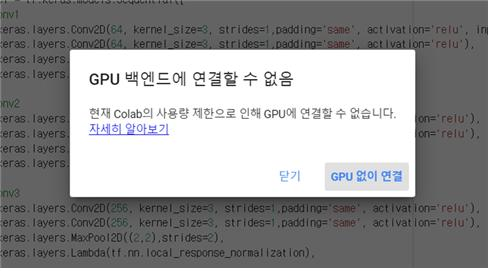